In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings(action='once')

from scipy import stats
from scipy.stats import norm, skew #for some statistics


#pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points


#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:
#function to get the encoding of the training data and test data

import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc


train_data_encoding = find_encoding('training.csv')
test_data_encoding = find_encoding('test.csv')

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.BufferedReader name='training.csv'>
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.BufferedReader name='test.csv'>
  


In [3]:
train_data = pd.read_csv('training.csv', encoding=train_data_encoding)
test_data = pd.read_csv('test.csv', encoding=test_data_encoding)

In [4]:
print(test_data.shape)
print(train_data.shape)

(2365, 32)
(7094, 37)


In [5]:
train_data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [6]:
train_data.describe()#.transpose()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train_data.isnull().sum().max()

0

In [8]:
train_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [9]:
test_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude'],
      dtype='object')

In [10]:
#read the feature engineered files to this notebook:
trainDistrictLongLat = pd.read_csv('trainDistrictLongLat.csv')  #contains new long and lat, with corresponding districts
testDistrictLongLat = pd.read_csv('testDistrictLongLat.csv')

trainRegion = pd.read_csv('trainRegion.csv')#contains the regions each long and lat falls in
testRegion = pd.read_csv('testRegion.csv')

In [11]:
trainRegion.head()

,region
0,Kigoma
1,Zanzibar
2,Morogoro
3,Arusha
4,Rukwa


In [12]:
#trainDistrictLongLat
#trainRegion

In [13]:
train_data = pd.concat([train_data, trainRegion, trainDistrictLongLat], axis=1)
test_data = pd.concat([test_data, testRegion, testDistrictLongLat], axis=1)

In [14]:
train_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification', 'region', 'district',
       'latitude', 'longitude'],
      dtype='object')

In [15]:
#rename the newly added longitudes and latitudes
train_data = train_data.rename(
    columns={'Latitude' : 'lat1', 'Longitude' : 'lng1', 'latitude' : 'lat2', 'longitude' : 'lng2'}
)

test_data = test_data.rename(
    columns={'Latitude' : 'lat1', 'Longitude' : 'lng1', 'latitude' : 'lat2', 'longitude' : 'lng2'}
)

In [16]:
#join the training set and test

ntrain = train_data.shape[0]
ntest = test_data.shape[0]

train_data.drop(['mobile_money', 'savings', 'borrowing', 'insurance'], axis = 1,inplace = True)

all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9459, 37)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [17]:
#all_data.isnull().sum()

In [18]:
#train_data[['mobile_money', 'savings', 'borrowing', 'insurance']].corrwith(train_data['mobile_money_classification'])

<h1>Feature Engineering</h1>

In [19]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q8_8,Q8_9,Q9,district,lat1,lat2,lng1,lng2,mobile_money_classification,region
0,5086,98,-1,-1,2,-1,2,-1,1,-1,...,0,1,-1,Kasulu,-4.460442,-4.57268,29.811396,30.11092,0.0,Kigoma
1,1258,40,-1,-1,1,4,1,5,4,4,...,0,0,1,Zanzibar,-6.176438,-6.16875,39.244871,39.20243,3.0,Zanzibar
2,331,18,-1,-1,2,-1,2,-1,1,-1,...,0,1,-1,Morogoro Urban,-6.825702,-6.82282,37.652798,37.67290,2.0,Morogoro
3,6729,50,-1,-1,1,2,2,-1,4,-1,...,0,0,-1,Karatu,-3.372049,-3.33868,35.808307,35.67410,3.0,Arusha
4,8671,34,1,-1,2,-1,1,1,1,-1,...,0,0,-1,Nkansi,-7.179645,-7.50237,31.039095,31.03970,3.0,Rukwa


In [20]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region'],
      dtype='object')

<h3>Longitude and Latitude</h3>

In [21]:
#A. Haversine Distance Between the Two Lat/Lons

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


all_data['Haversine_Distance'] = haversine_array(**all_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [22]:
#B. Manhattan Distance Between the two Lat/Lons

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b


all_data['Manhattan_Distance'] = dummy_manhattan_distance(**all_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [23]:
#C. Bearing Between the two Lat/Lons:

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


all_data['Bearing_Btw_Long_Lat'] = bearing_array(**all_data[['lat1', 'lng1', 'lat2', 'lng2']])

In [24]:
#D. Center Latitude and Longitude between Pickup and Dropoff

all_data.loc[:, 'center_latitude'] = (all_data['lat1'].values + all_data['lat2'].values) / 2
all_data.loc[:, 'center_longitude'] = (all_data['lng1'].values + all_data['lng2'].values) / 2

In [25]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,lat2,lng1,lng2,mobile_money_classification,region,Haversine_Distance,Manhattan_Distance,Bearing_Btw_Long_Lat,center_latitude,center_longitude
0,5086,98,-1,-1,2,-1,2,-1,1,-1,...,-4.57268,29.811396,30.11092,0.0,Kigoma,35.470208,45.684936,110.612449,-4.516561,29.961158
1,1258,40,-1,-1,1,4,1,5,4,4,...,-6.16875,39.244871,39.20243,3.0,Zanzibar,4.769069,5.546668,-79.675907,-6.172594,39.223650
2,331,18,-1,-1,2,-1,2,-1,1,-1,...,-6.82282,37.652798,37.67290,2.0,Morogoro,2.242443,2.539898,81.784591,-6.824261,37.662849
3,6729,50,-1,-1,1,2,2,-1,4,-1,...,-3.33868,35.808307,35.67410,3.0,Arusha,15.352713,18.607815,-76.018073,-3.355365,35.741204
4,8671,34,1,-1,2,-1,1,1,1,-1,...,-7.50237,31.039095,31.03970,3.0,Rukwa,35.885429,35.952111,179.893511,-7.341008,31.039398


In [26]:
#add up the latitude and longitude
all_data['latlong1'] = all_data['lat1'] + all_data['lng1']
all_data['latlong2'] = all_data['lat2'] + all_data['lng2']

In [27]:
#get x,y,z coordinates for each of the longitude and latitude

def x_coord(df):
    long = df[0]
    lat = df[1]
    
    return np.cos(lat)*np.cos(long)

def y_coord(df):
    long = df[0]
    lat = df[1]
    
    return np.cos(lat)*np.sin(long)

def z_coord(df):
    long = df[0]
    lat = df[1]
    
    return np.sin(lat)


all_data['X-Coordinate'] = all_data[['lng1', 'lat1']].apply(x_coord, axis=1)
all_data['Y-Coordinate'] = all_data[['lng1', 'lat1']].apply(y_coord, axis=1)
all_data['Z-Coordinate'] = all_data[['lng1', 'lat1']].apply(z_coord, axis=1)

In [28]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Haversine_Distance,Manhattan_Distance,Bearing_Btw_Long_Lat,center_latitude,center_longitude,latlong1,latlong2,X-Coordinate,Y-Coordinate,Z-Coordinate
0,5086,98,-1,-1,2,-1,2,-1,1,-1,...,35.470208,45.684936,110.612449,-4.516561,29.961158,25.350954,25.53824,0.008408,0.249148,0.968429
1,1258,40,-1,-1,1,4,1,5,4,4,...,4.769069,5.546668,-79.675907,-6.172594,39.223650,33.068433,33.03368,0.024892,0.993996,0.106545
2,331,18,-1,-1,2,-1,2,-1,1,-1,...,2.242443,2.539898,81.784591,-6.824261,37.662849,30.827096,30.85008,0.855494,-0.039650,-0.516293
3,6729,50,-1,-1,1,2,2,-1,4,-1,...,15.352713,18.607815,-76.018073,-3.355365,35.741204,32.436258,32.33542,0.306258,0.924137,0.228422
4,8671,34,1,-1,2,-1,1,1,1,-1,...,35.885429,35.952111,179.893511,-7.341008,31.039398,23.859450,23.53733,0.580570,-0.229757,-0.781121


In [29]:
from sklearn.decomposition import PCA

pca = PCA().fit(all_data[['lat1', 'lng1']])
all_data['coord1_pca'] = pca.transform(all_data[['lat1', 'lng1']])[:, 0]
all_data['coord1_pca'] = pca.transform(all_data[['lat1', 'lng1']])[:, 1]
all_data['coord2_pca'] = pca.transform(all_data[['lat2', 'lng2']])[:, 0]
all_data['coord2_pca'] = pca.transform(all_data[['lat2', 'lng2']])[:, 1]

C:\Users\USER\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USER\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USER\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Bearing_Btw_Long_Lat,center_latitude,center_longitude,latlong1,latlong2,X-Coordinate,Y-Coordinate,Z-Coordinate,coord1_pca,coord2_pca
0,5086,98,-1,-1,2,-1,2,-1,1,-1,...,110.612449,-4.516561,29.961158,25.350954,25.53824,0.008408,0.249148,0.968429,2.311495,2.208163
1,1258,40,-1,-1,1,4,1,5,4,4,...,-79.675907,-6.172594,39.223650,33.068433,33.03368,0.024892,0.993996,0.106545,-2.348708,-2.327717
2,331,18,-1,-1,2,-1,2,-1,1,-1,...,81.784591,-6.824261,37.662849,30.827096,30.85008,0.855494,-0.039650,-0.516293,-0.836609,-0.851593
3,6729,50,-1,-1,1,2,2,-1,4,-1,...,-76.018073,-3.355365,35.741204,32.436258,32.33542,0.306258,0.924137,0.228422,-2.335257,-2.275880
4,8671,34,1,-1,2,-1,1,1,1,-1,...,179.893511,-7.341008,31.039398,23.859450,23.53733,0.580570,-0.229757,-0.781121,3.633937,3.882970


Text(0.5, 1.0, 'QQ-Plot for Age')

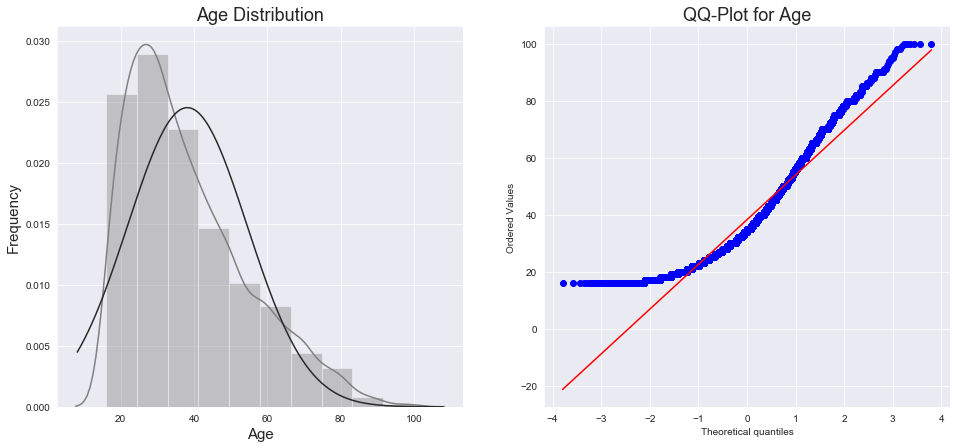

In [31]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)

ax1 = sns.distplot(all_data.Q1, fit=norm, color='gray', bins=10, ax=ax[0])
ax1.set_title('Age Distribution', size=18)
ax1.set_xlabel('Age', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2 = ax[1]
stats.probplot(all_data['Q1'], plot = ax2)
ax2.set_title('QQ-Plot for Age', size=18)

In [32]:
#sns.distplot(np.cbrt(all_data['Q1']))

In [33]:
all_data['Age_Group'] = np.floor(all_data.Q1/10)

In [34]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,center_latitude,center_longitude,latlong1,latlong2,X-Coordinate,Y-Coordinate,Z-Coordinate,coord1_pca,coord2_pca,Age_Group
0,5086,98,-1,-1,2,-1,2,-1,1,-1,...,-4.516561,29.961158,25.350954,25.53824,0.008408,0.249148,0.968429,2.311495,2.208163,9.0
1,1258,40,-1,-1,1,4,1,5,4,4,...,-6.172594,39.223650,33.068433,33.03368,0.024892,0.993996,0.106545,-2.348708,-2.327717,4.0
2,331,18,-1,-1,2,-1,2,-1,1,-1,...,-6.824261,37.662849,30.827096,30.85008,0.855494,-0.039650,-0.516293,-0.836609,-0.851593,1.0
3,6729,50,-1,-1,1,2,2,-1,4,-1,...,-3.355365,35.741204,32.436258,32.33542,0.306258,0.924137,0.228422,-2.335257,-2.275880,5.0
4,8671,34,1,-1,2,-1,1,1,1,-1,...,-7.341008,31.039398,23.859450,23.53733,0.580570,-0.229757,-0.781121,3.633937,3.882970,3.0


In [35]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Haversine_Distance',
       'Manhattan_Distance', 'Bearing_Btw_Long_Lat', 'center_latitude',
       'center_longitude', 'latlong1', 'latlong2', 'X-Coordinate',
       'Y-Coordinate', 'Z-Coordinate', 'coord1_pca', 'coord2_pca',
       'Age_Group'],
      dtype='object')

In [36]:
all_data.get_dtype_counts().index

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


Index(['float64', 'int64', 'object'], dtype='object')

<h4>Haversian Distance</h4>

Text(0.5, 1.0, 'QQ-Plot for Haversine Distance')

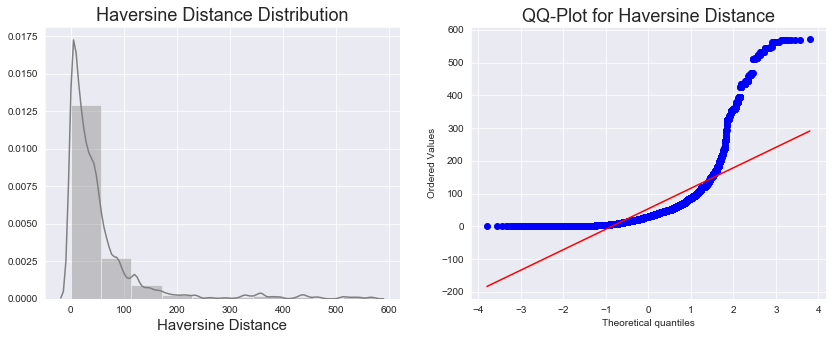

In [37]:
fig, ax = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)

ax1 = sns.distplot(all_data.Haversine_Distance, color='gray', bins=10, ax=ax[0])
ax1.set_title('Haversine Distance Distribution', size=18)
ax1.set_xlabel('Haversine Distance', size=15)
#ax1.set_ylabel('Frequency', size=15)

ax2 = ax[1]
stats.probplot(all_data['Haversine_Distance'], plot = ax2)
ax2.set_title('QQ-Plot for Haversine Distance', size=18)

In [38]:
skew = []

for i in range(1, 8):
    skewness = (all_data['Haversine_Distance']**(1/i)).skew()
    skew.append(skewness)
    

print('Best ith value is', skew.index(min(skew, key=abs)), 'with skewness of {:.4f}'.format(min(skew, key=abs)))

Best ith value is 5 with skewness of -0.0303


Text(0.5, 1.0, 'QQ-Plot')

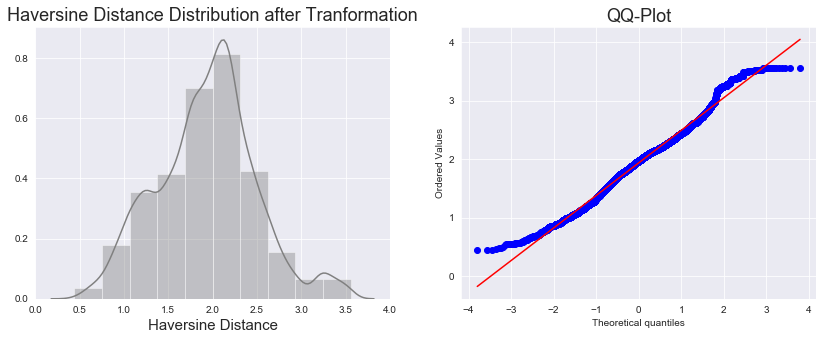

In [39]:
fig, ax = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)

ax1 = sns.distplot(all_data.Haversine_Distance**(1/5), color='gray', bins=10, ax=ax[0])
ax1.set_title('Haversine Distance Distribution after Tranformation', size=18)
ax1.set_xlabel('Haversine Distance', size=15)
#ax1.set_ylabel('Distribution', size=15)

ax2 = ax[1]
stats.probplot(all_data['Haversine_Distance']**(1/5), plot = ax2)
ax2.set_title('QQ-Plot', size=18)

In [40]:
all_data['Transformed_Haversine'] = (all_data['Haversine_Distance'])**(1/5)

In [41]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Haversine_Distance',
       'Manhattan_Distance', 'Bearing_Btw_Long_Lat', 'center_latitude',
       'center_longitude', 'latlong1', 'latlong2', 'X-Coordinate',
       'Y-Coordinate', 'Z-Coordinate', 'coord1_pca', 'coord2_pca', 'Age_Group',
       'Transformed_Haversine'],
      dtype='object')

In [42]:
skew = []

for i in range(1, 8):
    skewness = (all_data['Manhattan_Distance']**(1/i)).skew()
    skew.append(skewness)
    

print('Best ith value is', skew.index(min(skew, key=abs)), 'with skewness of {:.4f}'.format(min(skew, key=abs)))

Best ith value is 4 with skewness of 0.0212


Text(0.5, 1.0, 'QQ-Plot')

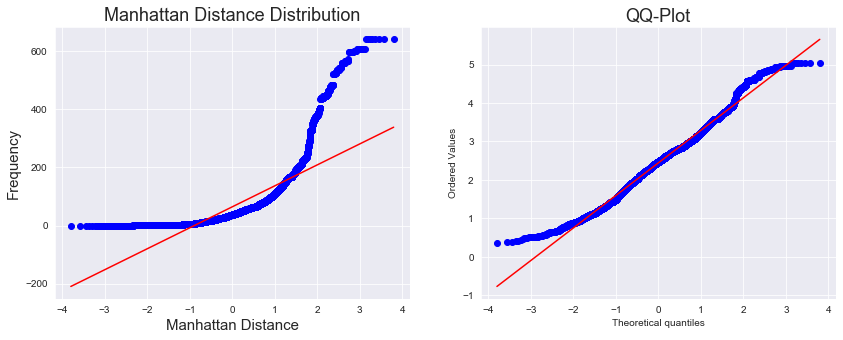

In [43]:
fig, ax = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)

ax1 = ax[0]
stats.probplot(all_data['Manhattan_Distance'], plot = ax1)
ax1.set_title('Manhattan Distance Distribution', size=18)
ax1.set_xlabel('Manhattan Distance', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2 = ax[1]
stats.probplot(all_data['Manhattan_Distance']**(1/4), plot = ax2)
ax2.set_title('QQ-Plot', size=18)

In [44]:
all_data['Transformed_Manhattan'] = (all_data['Manhattan_Distance'])**(1/4)

In [45]:
#all_data.head()

In [46]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Haversine_Distance',
       'Manhattan_Distance', 'Bearing_Btw_Long_Lat', 'center_latitude',
       'center_longitude', 'latlong1', 'latlong2', 'X-Coordinate',
       'Y-Coordinate', 'Z-Coordinate', 'coord1_pca', 'coord2_pca', 'Age_Group',
       'Transformed_Haversine', 'Transformed_Manhattan'],
      dtype='object')

In [47]:
all_data.drop(['Haversine_Distance', 'Manhattan_Distance'], axis=1, inplace=True)

In [48]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Bearing_Btw_Long_Lat',
       'center_latitude', 'center_longitude', 'latlong1', 'latlong2',
       'X-Coordinate', 'Y-Coordinate', 'Z-Coordinate', 'coord1_pca',
       'coord2_pca', 'Age_Group', 'Transformed_Haversine',
       'Transformed_Manhattan'],
      dtype='object')

In [49]:
#simplify some features

all_data.Q3 = all_data.Q3.replace({4:0, 3:1, 
                                   2:2, 1:3
                                  })

all_data.Q4 = all_data.Q4.replace({7:0})

all_data.Q5 = all_data.Q5.replace({6:0, 5:1, 4:2, 3:3, 2:4, 1:5})

all_data.Q6 = all_data.Q6.replace({2:0})

all_data.Q7 = all_data.Q7.replace({2:0, 1:1})

all_data.Q14 = all_data.Q7.replace({2:0, 1:1})

all_data.Q9 = all_data.Q9.replace({7:0, 6:1, 4:2, 2:3, 1:4, 5:5, 3:6})

all_data.Q18 = all_data.Q18.replace({5:0, 4:1, 3:2, 2:2, 1:3})

all_data.Q12 = all_data.Q12.replace({2:0, 1:1})

In [50]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,latlong1,latlong2,X-Coordinate,Y-Coordinate,Z-Coordinate,coord1_pca,coord2_pca,Age_Group,Transformed_Haversine,Transformed_Manhattan
0,5086,98,-1,-1,0,-1,0,-1,1,-1,...,25.350954,25.53824,0.008408,0.249148,0.968429,2.311495,2.208163,9.0,2.041610,2.599820
1,1258,40,-1,-1,1,4,1,5,4,4,...,33.068433,33.03368,0.024892,0.993996,0.106545,-2.348708,-2.327717,4.0,1.366743,1.534645
2,331,18,-1,-1,0,-1,1,-1,1,-1,...,30.827096,30.85008,0.855494,-0.039650,-0.516293,-0.836609,-0.851593,1.0,1.175288,1.262421
3,6729,50,-1,-1,1,2,1,-1,4,-1,...,32.436258,32.33542,0.306258,0.924137,0.228422,-2.335257,-2.275880,5.0,1.726780,2.076939
4,8671,34,1,-1,0,-1,1,1,1,-1,...,23.859450,23.53733,0.580570,-0.229757,-0.781121,3.633937,3.882970,3.0,2.046367,2.448675


In [51]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Bearing_Btw_Long_Lat',
       'center_latitude', 'center_longitude', 'latlong1', 'latlong2',
       'X-Coordinate', 'Y-Coordinate', 'Z-Coordinate', 'coord1_pca',
       'coord2_pca', 'Age_Group', 'Transformed_Haversine',
       'Transformed_Manhattan'],
      dtype='object')

In [52]:
all_data.Q5

0       5
1       1
2       3
3       5
4       5
       ..
9454    4
9455    5
9456    5
9457    1
9458    5
Name: Q5, Length: 9459, dtype: int64

In [53]:
#some mini feature engineering

all_data['Land_Score'] = all_data.Q5 + all_data.Q6

#all_data['Income_Score'] = all_data.Q8_1 + all_data.Q8_2 + all_data.Q8_3 + all_data.Q8_4 + all_data.Q8_5 + all_data.Q8_6 + all_data.Q8_7 + all_data.Q8_8 + all_data.Q8_9 + all_data.Q8_10 + all_data.Q8_11

all_data['Money_Sent'] = all_data.Q12 + all_data.Q13

all_data['Money_Received'] = all_data.Q14 + all_data.Q15

all_data['Received_Sent'] = all_data.Q13 + all_data.Q15

all_data['Transactions'] = all_data.Q16 + all_data.Q17

all_data['Literacy_Level'] = all_data.Q18 + all_data.Q19

all_data['Q8_1_7'] = all_data['Q8_1'] + all_data['Q8_7']

all_data['Q8_8_9_10'] = all_data['Q8_8'] + all_data['Q8_9'] + all_data['Q8_10']

all_data['Income_Score'] = all_data['Q8_2'] + all_data['Q8_3'] + all_data['Q8_4'] + all_data['Q8_5'] + all_data['Q8_6']

all_data['Q1_Q16'] = all_data['Q1']/all_data['Q16']

In [54]:
all_data.head()

,ID,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Land_Score,Money_Sent,Money_Received,Received_Sent,Transactions,Literacy_Level,Q8_1_7,Q8_8_9_10,Income_Score,Q1_Q16
0,5086,98,-1,-1,0,-1,0,-1,1,-1,...,5,-1,-1,-2,0,5,0,1,0,98.0
1,1258,40,-1,-1,1,4,1,5,4,4,...,2,5,6,9,8,7,1,0,0,10.0
2,331,18,-1,-1,0,-1,1,-1,1,-1,...,3,-1,0,-2,0,4,0,1,0,18.0
3,6729,50,-1,-1,1,2,1,-1,4,-1,...,6,3,0,1,3,7,0,0,1,12.5
4,8671,34,1,-1,0,-1,1,1,1,-1,...,5,-1,2,0,0,7,0,0,1,34.0


In [55]:
all_data.columns

Index(['ID', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_10',
       'Q8_11', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q9', 'district', 'lat1', 'lat2', 'lng1', 'lng2',
       'mobile_money_classification', 'region', 'Bearing_Btw_Long_Lat',
       'center_latitude', 'center_longitude', 'latlong1', 'latlong2',
       'X-Coordinate', 'Y-Coordinate', 'Z-Coordinate', 'coord1_pca',
       'coord2_pca', 'Age_Group', 'Transformed_Haversine',
       'Transformed_Manhattan', 'Land_Score', 'Money_Sent', 'Money_Received',
       'Received_Sent', 'Transactions', 'Literacy_Level', 'Q8_1_7',
       'Q8_8_9_10', 'Income_Score', 'Q1_Q16'],
      dtype='object')

In [56]:
cat_features = ['Q1', 'Q10', 'Q11']

for feat in cat_features:
    all_data[feat] = all_data[feat].astype(str)

In [57]:
all_data.get_dtype_counts()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    19
int64      36
object      5
dtype: int64

In [58]:
all_data = pd.get_dummies(all_data)

In [59]:
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]

In [60]:
train_data.shape

(7094, 304)

In [61]:
test_data.shape

(2365, 304)

In [62]:
train_data.drop('ID', axis=1, inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
testId = test_data['ID']
test_data.drop(['ID', 'mobile_money_classification'], axis=1, inplace=True)

In [64]:
X= train_data.drop( 'mobile_money_classification', axis = 1)
y = train_data["mobile_money_classification"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [65]:
train_data['mobile_money_classification'].value_counts()

3.0    3126
1.0    1778
0.0    1386
2.0     804
Name: mobile_money_classification, dtype: int64

<h2>MODELLING</h2>

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

C:\Users\USER\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [68]:
train_data.shape

(7094, 303)

In [69]:
test_data.shape

(2365, 302)

RANDOM FOREST

In [70]:
rfc = RandomForestClassifier(n_estimators=2500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rfc_score = -cross_val_score(rfc, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1).mean()

In [72]:
rfc_score

0.7686708457027335

Extra Tree Classifier

In [73]:
etc = ExtraTreesClassifier(n_estimators=2500)
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=2500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [74]:
etc_score = -cross_val_score(rfc, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1).mean()

In [75]:
etc_score

0.7696962503308304

In [77]:
pd.DataFrame(
    {
        'Models' : ['RandomForest', 'ExtraTrees'],
        'Scores' : [rfc_score, etc_score]
    }
).sort_values(by='Scores', ascending=False).reset_index(drop=True)

,Models,Scores
0,ExtraTrees,0.769696
1,RandomForest,0.768671


In [79]:
etc = ExtraTreesClassifier(n_estimators=2500, criterion='gini')
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=2500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
#-cross_val_score(etc, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1).mean()

In [78]:
rfc = RandomForestClassifier(n_estimators=2500, criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#-cross_val_score(rfc, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1).mean()

In [80]:
from sklearn.ensemble import VotingClassifier

In [81]:
voting = VotingClassifier(estimators=[
    ('ExtraTressClf', etc),
    ('RandomForestClf', rfc),
],
    voting='soft',
    weights=[3, 3])

In [82]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('ExtraTressClf',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=2500,
                                                   n_jobs=None, oob_score=False,
      

In [78]:
-cross_val_score(voting, X_train, y_train, scoring='neg_log_loss', cv=5, n_jobs=-1).mean()

0.7686440156814406

In [77]:
pred = voting.predict_proba(X_test)
log_loss(y_test, pred)

0.7789251012949655

In [79]:
#fitting on the whole dataset
voting.fit(X, y)

VotingClassifier(estimators=[('ExtraTressClf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[3, 3])

In [80]:
#read the submission file
sample = pd.read_csv('sample_submission.csv')

In [81]:
sample.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [82]:
sub_columns = sample.columns

In [83]:
predictions = voting.predict_proba(test_data)

#predictions

In [84]:
predictions

array([[0.000e+00, 2.600e-03, 1.736e-01, 8.238e-01],
       [6.400e-03, 2.160e-02, 2.066e-01, 7.654e-01],
       [2.000e-04, 4.200e-03, 9.060e-02, 9.050e-01],
       ...,
       [1.172e-01, 7.798e-01, 1.760e-02, 8.540e-02],
       [2.494e-01, 4.998e-01, 4.040e-02, 2.104e-01],
       [5.202e-01, 4.352e-01, 4.200e-03, 4.040e-02]])

In [92]:
predictions = pd.DataFrame(predictions, columns=sub_columns[1:])
testId = testId.reset_index(drop=True)

submission = pd.concat([testId, predictions], axis=1)

In [93]:
submission.sample(7)

,ID,no_financial_services,other_only,mm_only,mm_plus
141,4970,0.0024,0.0062,0.0886,0.9028
34,1534,0.0036,0.0088,0.1342,0.8534
2135,7016,0.0112,0.0182,0.1406,0.8300
2032,412,0.0066,0.0068,0.1706,0.8160
1568,4818,0.6570,0.3134,0.0110,0.0186
1268,1555,0.0076,0.0072,0.1252,0.8600
19,5516,0.0386,0.4504,0.1678,0.3432


In [94]:
submission.to_csv('submission.csv', index=False)